# Desafio Guiado s4

### Req 1: importar librerias y .csv

* Importe las librerías básicas para el análisis de datos
* Descargue e importe el archivo nations.csv

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
# importamos seaborn, siguiendo la convención de renombrarlo como sns
import seaborn as sns
plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (5,3) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 200 # resolución gráficos

* country: País.
* region: Continente del país.
* gdp: Producto Interno Bruto per cápita, precios 2005.
* school: Promedio años de escolaridad.
* adfert: Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
* chldmort: Probabilidad de muerte antes de los 5 años por cada 1000.
* life: Esperanza de vida al nacer.
* pop: Población total.
* urban: Porcentaje de población urbana.
* femlab: Tasa entre hombres y mujeres en el mercado laboral.
* literacy: Tasa de alfabetismo.
* co2: Toneladas de Co2 mitidas per cápita.
* gini: Coeficiente de desigualdad del ingreso.

* Apellidos desde la A hasta la N: Enfocarse en las variables chldmort, adfert y life.
* Apellidos desde la M hasta la Z: Enfocarse en las variables femlab, literacy y school.

In [116]:
columnas_ap = ['adfert', 'chldmort', 'life']

In [123]:
df = pd.read_csv('nations.csv', encoding='iso-8859-1')
df.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


In [124]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [128]:
df.columns

Index(['country', 'region', 'gdp', 'school', 'adfert', 'chldmort', 'life',
       'pop', 'urban', 'femlab', 'literacy', 'co2', 'gini'],
      dtype='object')

### Req 2: Refactorizar gráficos matplotlib a seaborn

A partir de una serie de gráficos construidos con matplotlib, se solicita refactorizarlos utilizando seaborn.
Además, se presenta la función que se utilizó para construirlos. Intente llegar al resultado con mayor similitud. Comente los principales resultados de los gráficos.

* Histogramas

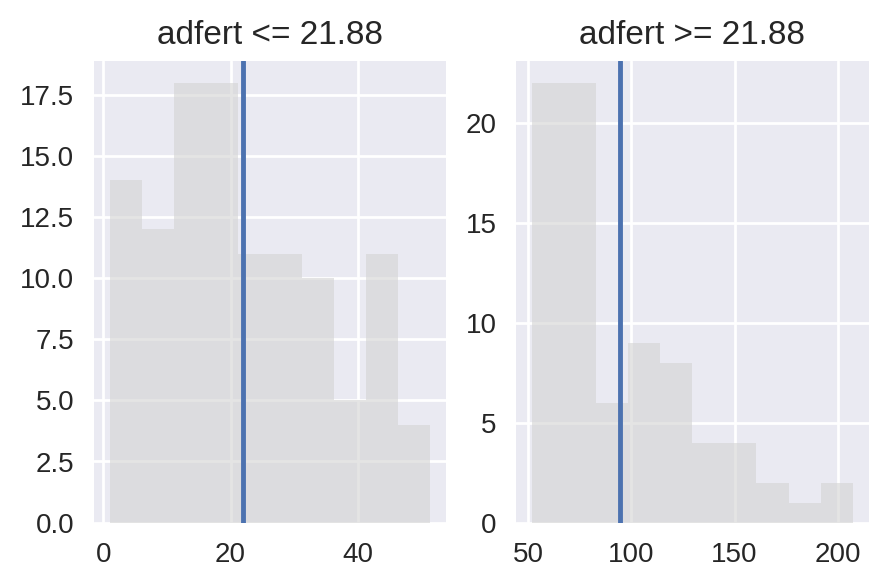

In [129]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe.copy()
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))
binarize_histogram(df, 'adfert')

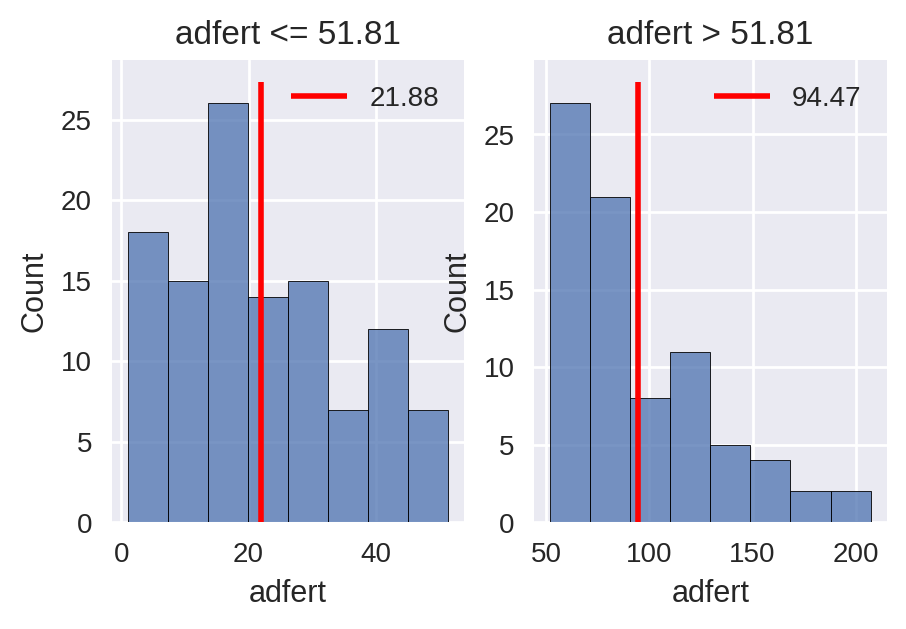

In [211]:
def binarize_histogram2(dataframe, variable):
    tmp = dataframe.copy()
    media = np.mean(tmp[variable])
    tmp['binarize'] = np.where(tmp[variable] > media, 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()

    fig, (ax1 , ax2) = plt.subplots(ncols=2)
    ax1.set_title(f'{variable} <= {np.round(media, 2)}')
    sns.histplot(hist_0, ax=ax1)
    ax1.vlines(hist_0.mean(), *ax1.get_ylim(),color='red', linewidth=2)
    ax1.legend([np.round(hist_0.mean(),2)])

    ax2.set_title(f'{variable} > {np.round(media, 2)}')
    sns.histplot(hist_1, ax=ax2)
    ax2.vlines(hist_1.mean(), *ax2.get_ylim(), color='red', linewidth=2)
    ax2.legend([np.round(hist_1.mean(),2)])
    
    #ax1.annotate('Titulo', xy=(21,27))
binarize_histogram2(df, 'adfert')

* Boxplots

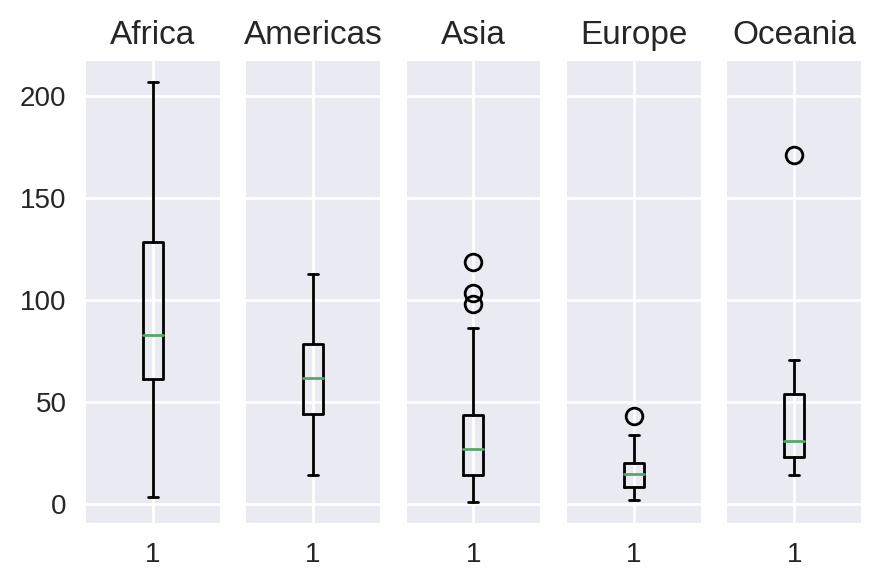

In [131]:
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe.copy()
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)

grouped_boxplot(df, 'adfert', 'region')

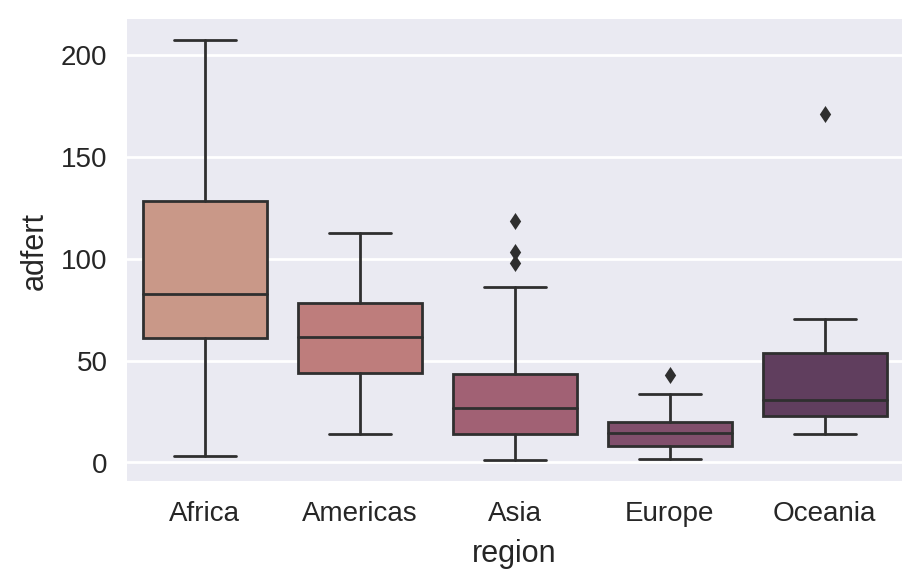

In [132]:
def grouped_boxplot2(dataframe, variable, group_by):
    tmp = dataframe.copy()
    sns.boxplot(y=tmp[variable].dropna(), x=tmp[group_by], 
    palette='flare', saturation=0.5, fliersize=3, linewidth=1)

grouped_boxplot2(df, 'adfert', 'region')

* Scatterplots

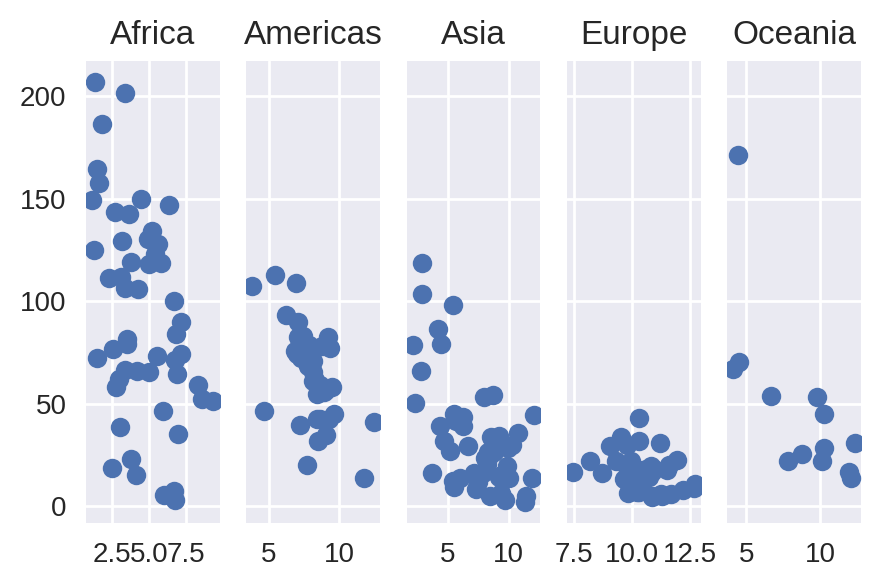

In [133]:
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)
 
grouped_scatterplot(df, 'school', 'adfert', 'region')

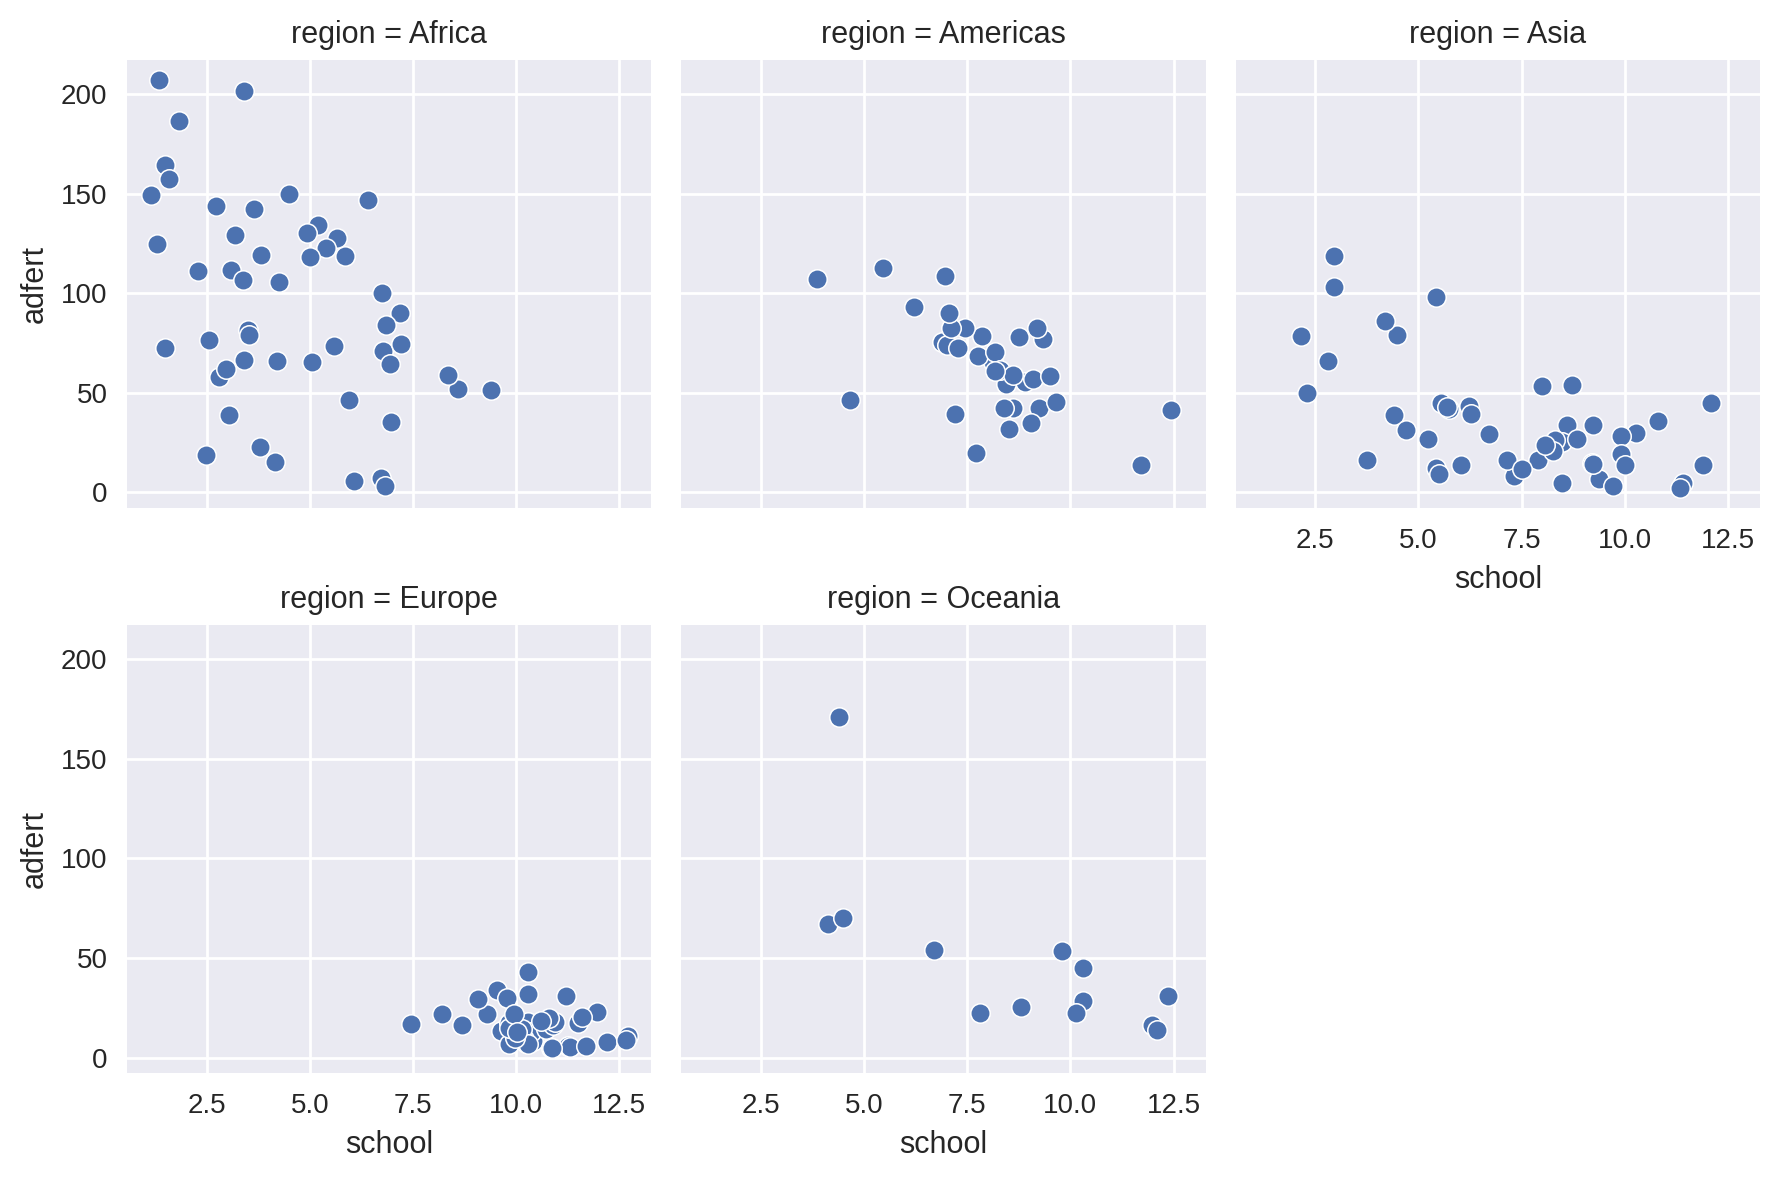

In [134]:
def refactored_scatterplot(dataframe, x, y, group_by):
    g = sns.FacetGrid(data=dataframe, col=group_by, col_wrap=3)
    g.map(sns.scatterplot, x, y)

refactored_scatterplot(df, 'school', 'adfert', 'region')

### Req 3: Generar un heatmap entre todas las variables

In [135]:
var_cont = ['gdp',
'school',
'adfert',
'chldmort',
'life',
'pop',
'urban',
'femlab',
'literacy',
'co2',
'gini']


<AxesSubplot:>

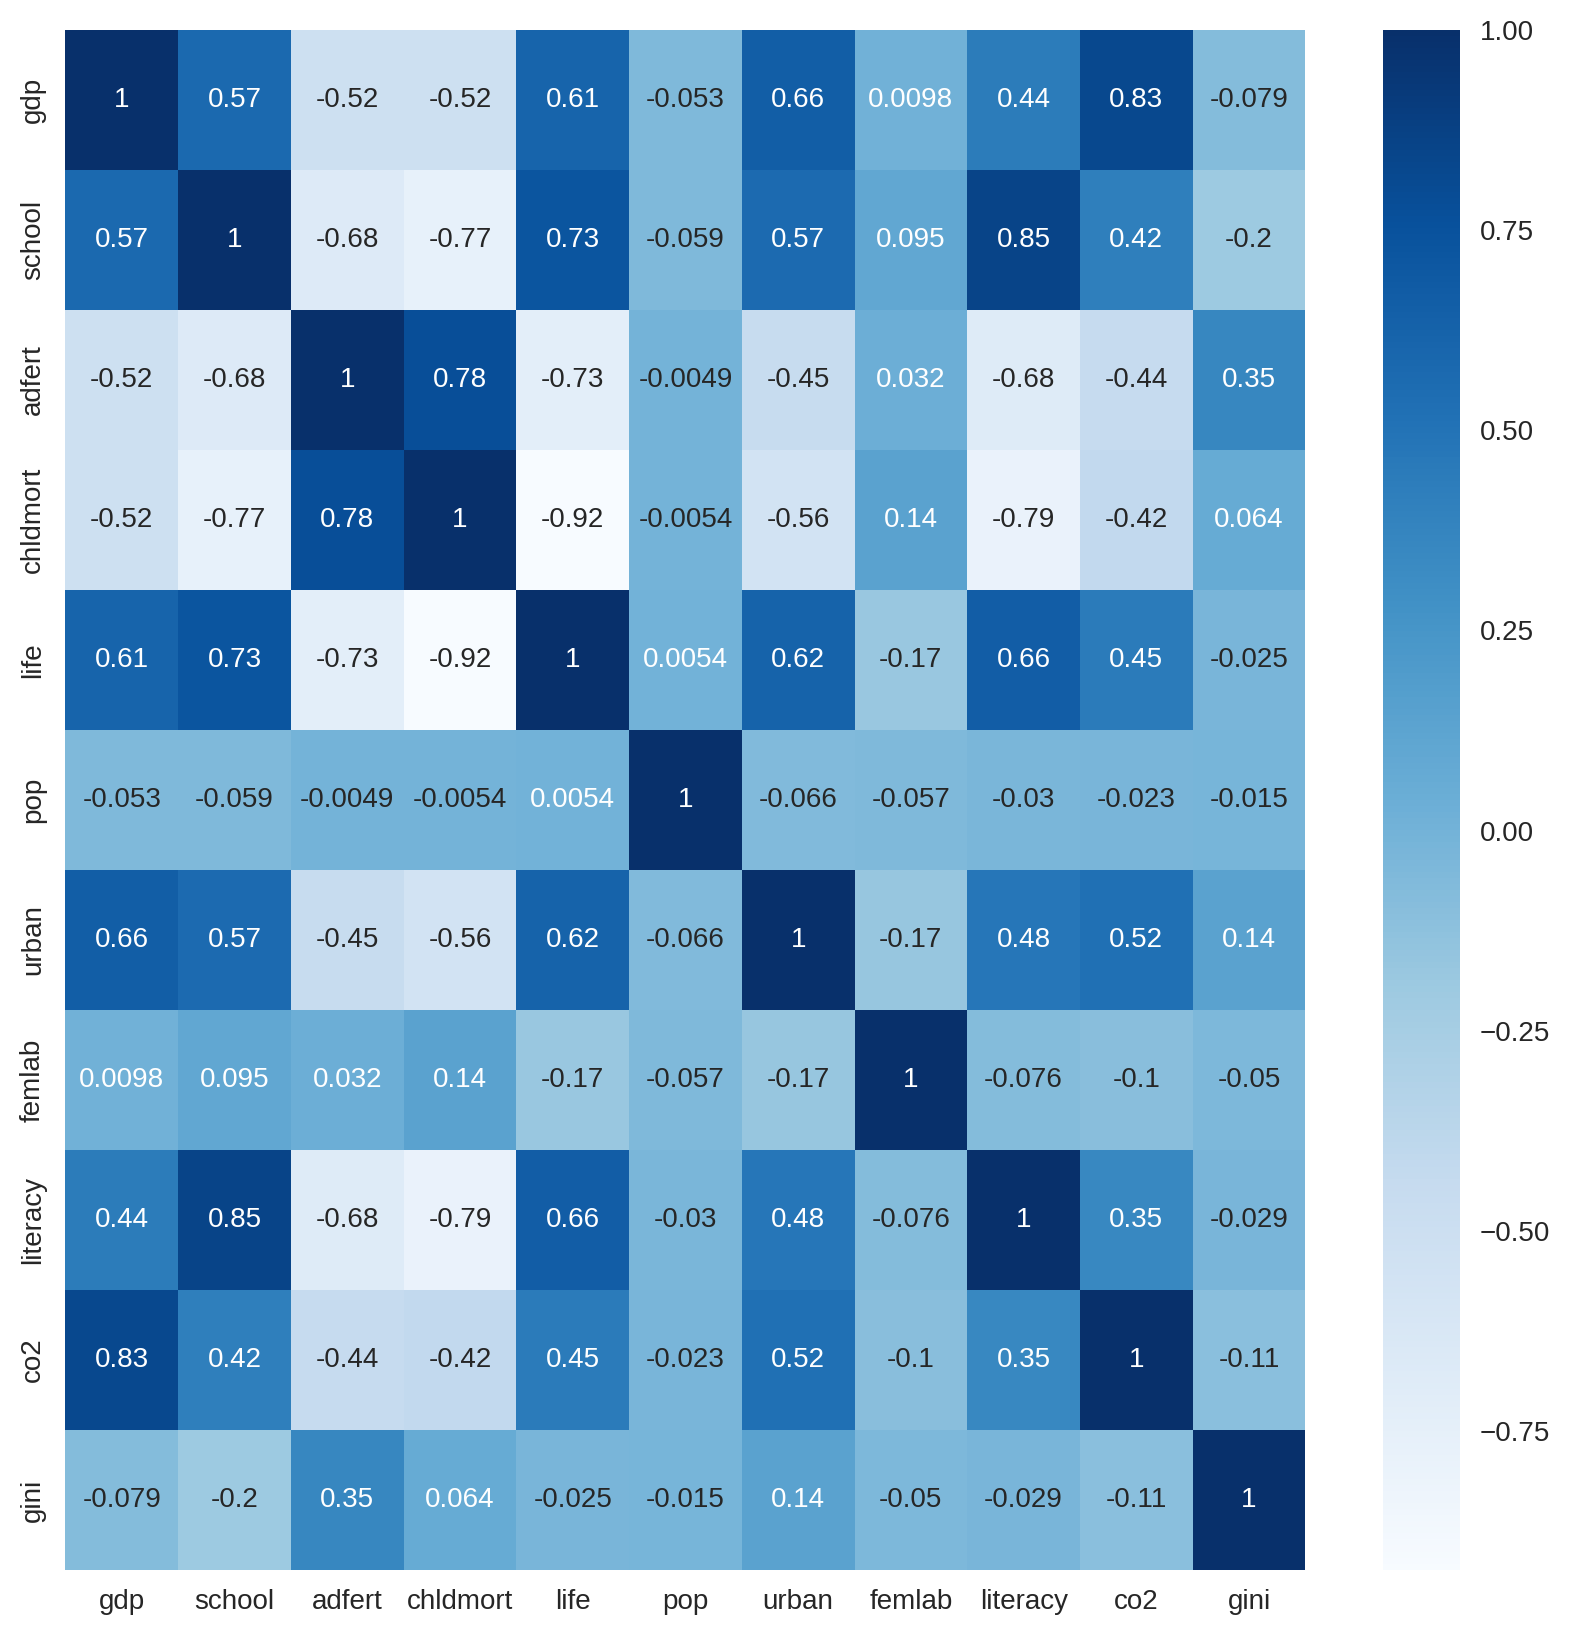

In [136]:
plt.figure(figsize=(10,10))
sns.heatmap(df[var_cont].corr(),cmap='Blues', annot=True)

* Con base en las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6

In [137]:
columnas_ap

['adfert', 'chldmort', 'life']

In [138]:
df_ap = df.loc[:,columnas_ap].dropna()
df_ap

,adfert,chldmort,life
0,7.300000,34.75,72.316666
1,111.699997,122.75,54.733334
2,52.099998,60.25,52.250000
3,124.800003,170.50,53.783333
4,18.600000,168.50,48.866665
...,...,...,...
189,28.299999,26.75,71.533333
190,70.300003,36.00,66.500000
191,22.299999,19.25,71.833336
192,23.299999,36.50,66.033333


In [139]:
df_ap_corr = df_ap.corr()
df_ap_corr

,adfert,chldmort,life
adfert,1.000000,0.777416,-0.729852
chldmort,0.777416,1.000000,-0.923563
life,-0.729852,-0.923563,1.000000


<AxesSubplot:>

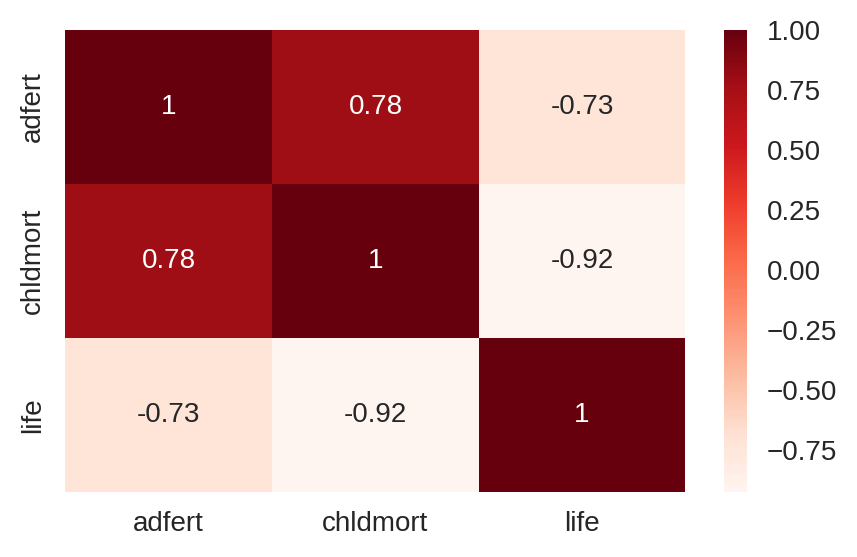

In [140]:
sns.heatmap(df_ap_corr, cmap='Reds', annot=True)

* adfert: Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
* chldmort: Probabilidad de muerte antes de los 5 años por cada 1000.
* life: Esperanza de vida al nacer.

Se observa una fuerte relacion entre las variables, ya sea inversa o directa.
* Fertilidad adolescente  vs. muerte antes de los 5 años presentan una relacion de 0.78 indicando una correlacion positiva
* Por otro lado la esperanza de vida vs. fertilidad adolescente (-0.73) y la probabilidad de muerte antes de los 5 años (-0.92) muestran una relacion inversa, es decir que a medida que aumenta la esperanza de vida ambas variables tienden a disminuir.

### Req 4

* A partir de las principales correlaciones, separarlas en un nuevo objeto y calcular la matriz de correlaciones para todas las regiones

* Comente brevemente las principales correlaciones a través de las regiones.

In [144]:
regiones = df['region'].unique()

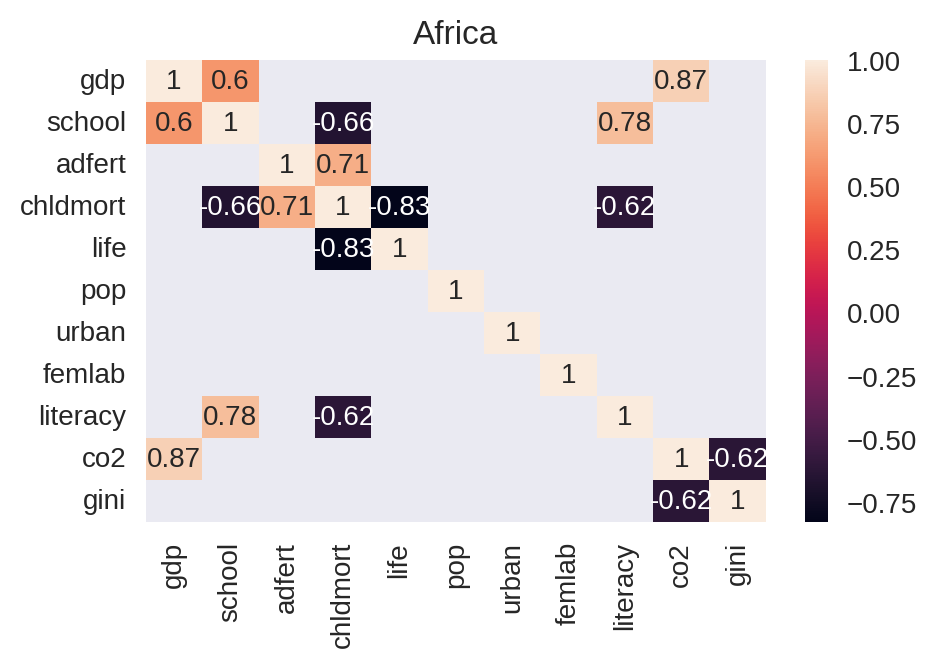

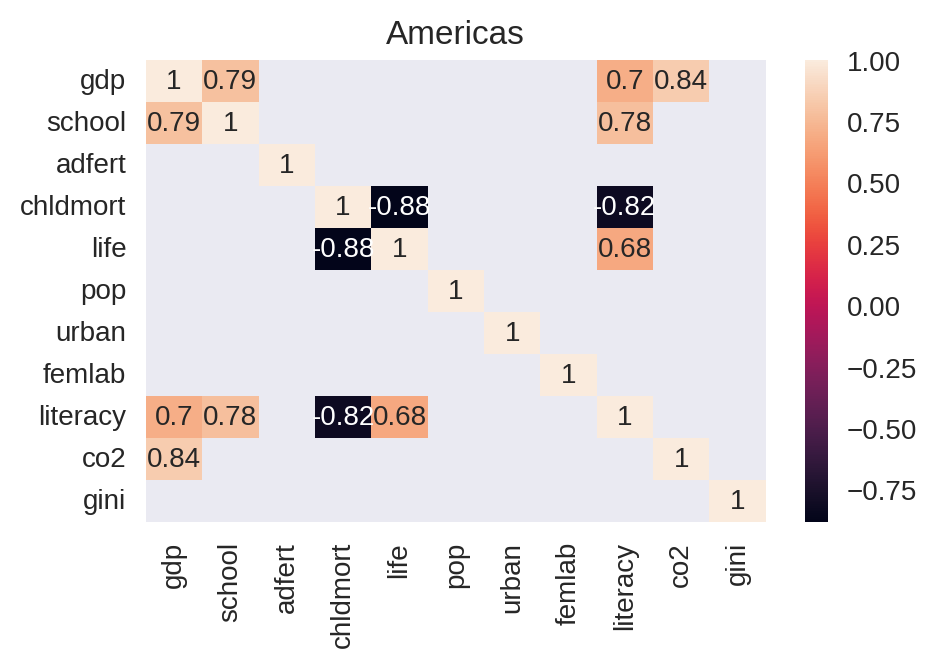

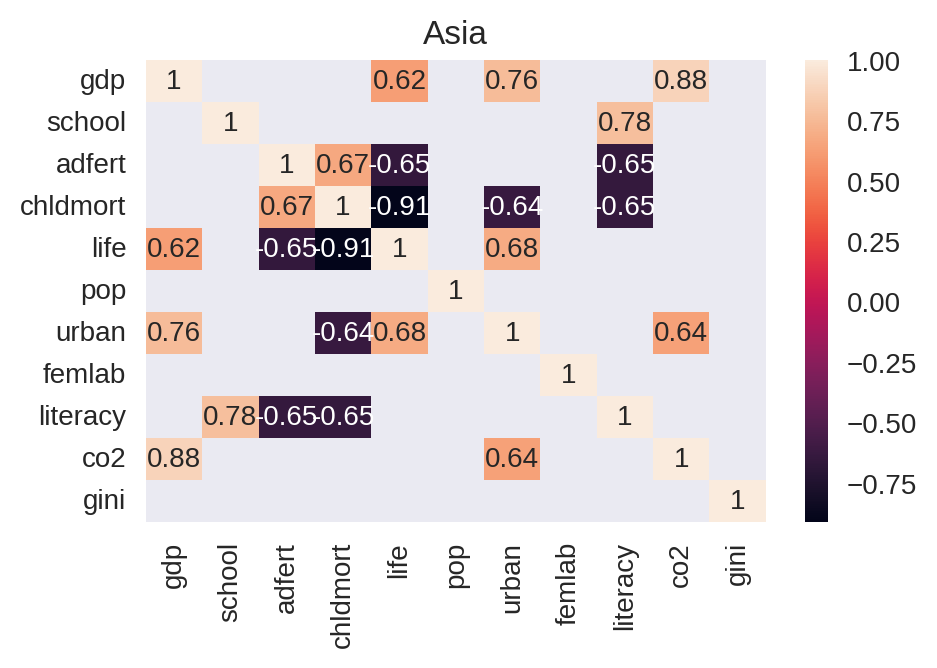

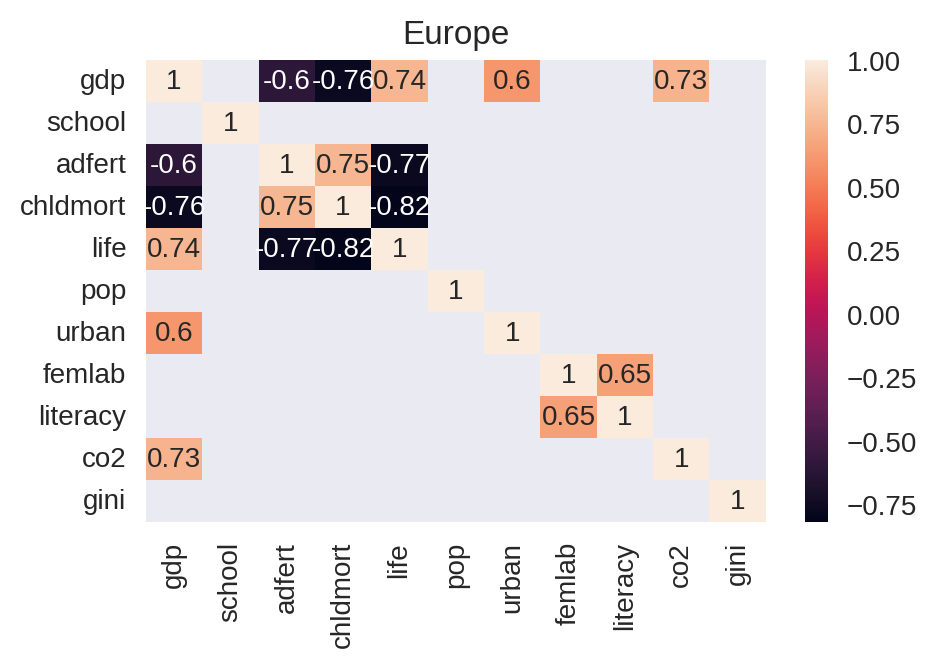

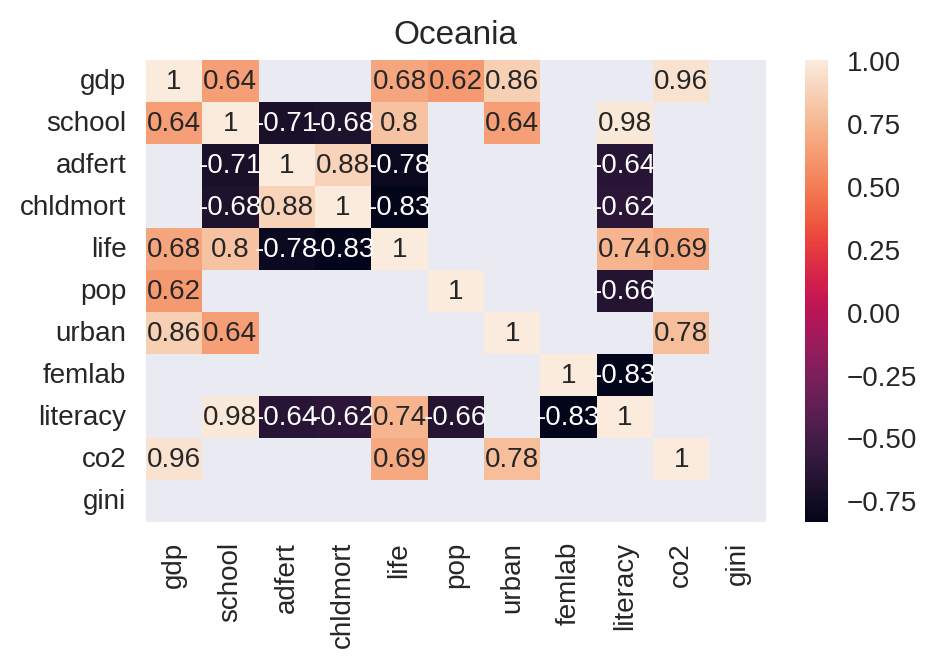

In [151]:
for reg in regiones:
    df_corr_reg = df[df['region']==reg].corr()
    plt.figure()
    sns.heatmap(df_corr_reg[(df_corr_reg>.6) | (df_corr_reg<-.6)], annot=True)
    plt.title(reg)

* El producto interno bruto muestra una relacion directa en todos los continentes, sin embargo para Europa pareciera afectar menos que en Oceania, probablemente esto se deba a las politicas de energias renovables existentes en europa.

* Es curioso que en todos los continentes menos en Europa se relacione directamente el alfabetismo con el promedio de años de escolaridad, para el cual la correlacion nos indica que no estan relacionadas las variables.